# KPMG Model 2 Data Analysis

In [1]:
# Importing Liberaries
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import timedelta
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Lets import the file Cleaned_Transactions to df1
df1 = pd.read_csv(r"C:\Users\****\Desktop\KPMG\Cleaned_Transactions.csv")
df1.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit,Months,Weekdays
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245,17.87,Feb,Saturday
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701,1702.55,May,Sunday
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361,1544.61,Oct,Monday
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145,817.36,Aug,Thursday
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226,1055.82,Oct,Sunday


In [3]:
# Lets import the file Cleaned_CustomerDemographic to df2
df2 = pd.read_csv(r"C:\Users\*****\Desktop\KPMG\Cleaned_CustomerDemographic.csv")
df2.head(5)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,Age_round
0,1,Laraine,Medendorp,Female,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11,67.0,70.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,Yes,16,40.0,40.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,Yes,15,67.0,70.0
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,No,7,59.0,60.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,Yes,8,43.0,40.0


In [4]:
# Merging two dataframes df1 and df2
df3 =  (pd.merge(df1, df2, on='customer_id'))
df3.describe()

,transaction_id,product_id,customer_id,list_price,standard_cost,product_first_sold_date,Profit,past_3_years_bike_related_purchases,tenure,Age,Age_round
count,19170.000000,19170.000000,19170.000000,19170.000000,19170.000000,19170.000000,19170.000000,19170.000000,19170.000000,19170.000000,19170.000000
mean,9994.693166,45.776839,1739.126917,1106.022698,555.512647,38204.734429,550.510051,48.963693,10.674387,42.941419,42.416797
std,5773.288020,30.569544,1011.078259,583.008143,405.729228,2874.571409,492.944663,28.623930,5.674990,12.625757,13.209725
min,1.000000,0.000000,1.000000,12.010000,7.210000,33259.000000,4.800000,0.000000,1.000000,18.000000,20.000000
25%,4996.250000,18.000000,858.000000,575.270000,215.140000,35667.000000,133.780000,24.000000,6.000000,33.000000,30.000000
50%,9993.500000,45.000000,1735.000000,1163.890000,507.580000,38216.000000,445.210000,48.000000,11.000000,43.000000,40.000000
75%,14997.250000,72.000000,2615.000000,1635.300000,795.100000,40672.000000,827.160000,73.000000,15.000000,52.000000,50.000000
max,20000.000000,100.000000,3500.000000,2091.470000,1759.850000,42710.000000,1702.550000,99.000000,22.000000,89.000000,90.000000


In [5]:
# Information on new dataframe
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19170 entries, 0 to 19169
Data columns (total 29 columns):
transaction_id                         19170 non-null int64
product_id                             19170 non-null int64
customer_id                            19170 non-null int64
transaction_date                       19170 non-null object
online_order                           18826 non-null object
order_status                           19170 non-null object
brand                                  19170 non-null object
product_line                           19170 non-null object
product_class                          19170 non-null object
product_size                           19170 non-null object
list_price                             19170 non-null float64
standard_cost                          19170 non-null float64
product_first_sold_date                19170 non-null int64
Profit                                 19170 non-null float64
Months                                

# Lets Analyise With RFM model

In [6]:
#lets find Recency

In [7]:
# For reference : https://towardsdatascience.com/recency-frequency-monetary-model-with-python-and-how-sephora-uses-it-to-optimize-their-google-d6a0707c5f17

In [8]:
# To find Recency lets convert to pandas Datetime
df3['transaction_date'] = pd.to_datetime(df3['transaction_date'])

In [9]:
snapshot_date = df3['transaction_date'].max() + timedelta(days=1)
recency = (snapshot_date - df3['transaction_date'])
recency.head(5)

0   309 days
1    76 days
2   249 days
3   224 days
4    87 days
Name: transaction_date, dtype: timedelta64[ns]

In [10]:
# Converting recency to dataframe and convert to timedelta format
df3['recency'] = recency
df3['recency'] = df3['recency'].astype("timedelta64[D]")

In [11]:
# Grouping with customer_id

In [12]:
data_process = df3.groupby(['customer_id']).agg({'recency': 'min','product_id': 'count','list_price': 'sum'})
data_process.head(5)

,recency,product_id,list_price
customer_id,,,
1,8.0,11,9084.45
2,129.0,3,4149.07
3,103.0,8,9888.23
4,196.0,2,1047.72
5,17.0,6,5903.20


In [13]:
data_process = data_process.reset_index()
data_process.columns

Index(['customer_id', 'recency', 'product_id', 'list_price'], dtype='object')

In [14]:
# Rename the columns 
data_process.rename(columns={'recency': 'Recency',
                         'product_id': 'Frequency',
                         'list_price': 'MonetaryValue'}, inplace=True)

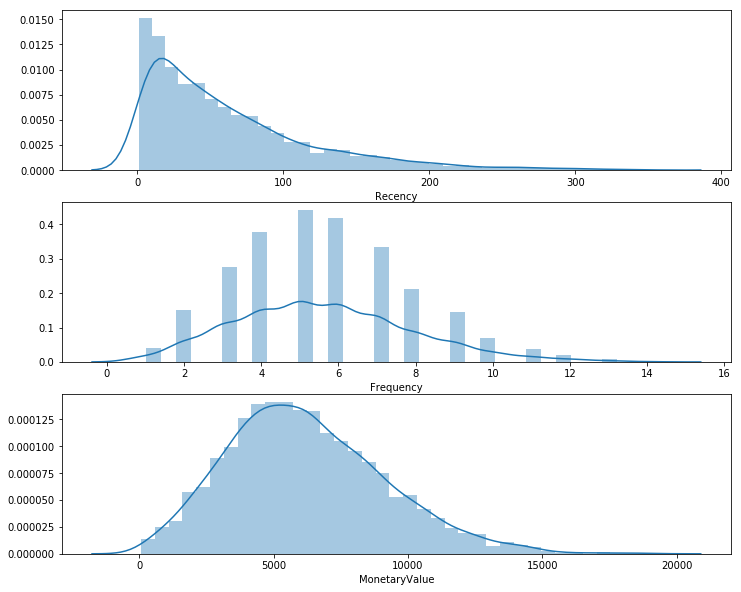

In [15]:
#Visualizing the data of Recency, Frequency and Monetary_Value
plt.figure(figsize=(12,10))
plt.subplot(3, 1, 1); sns.distplot(data_process['Recency'])
plt.subplot(3, 1, 2); sns.distplot(data_process['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(data_process['MonetaryValue'])
plt.show()


In [16]:
data_process.head()

,customer_id,Recency,Frequency,MonetaryValue
0,1,8.0,11,9084.45
1,2,129.0,3,4149.07
2,3,103.0,8,9888.23
3,4,196.0,2,1047.72
4,5,17.0,6,5903.20


In [17]:
# --Calculate R and F groups--

In [18]:
# Create labels for Recency and Frequency
r_labels = range(1, 6)
f_labels = range(1, 6)

In [19]:
#Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(data_process['Recency'], q=5, labels=r_labels)

In [20]:
# Assign these labels to 4 equal percentile groups 
f_groups = pd.qcut(data_process['Frequency'], q=5, labels=f_labels)

In [21]:
# Create new columns R and F 
data_process = data_process.assign(R = r_groups.values, F = f_groups.values)
data_process.head()

,customer_id,Recency,Frequency,MonetaryValue,R,F
0,1,8.0,11,9084.45,1,5
1,2,129.0,3,4149.07,5,1
2,3,103.0,8,9888.23,5,5
3,4,196.0,2,1047.72,5,1
4,5,17.0,6,5903.20,2,3


In [22]:
# Create labels for MonetaryValue
m_labels = range(1, 6)
# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(data_process['MonetaryValue'], q=5, labels=m_labels)
# Create new column M
data_process = data_process.assign(M = m_groups.values)

In [23]:
data_process['RFM_Score'] = data_process[['R','F','M']].sum(axis=1)

In [24]:
data_process.head(5)

,customer_id,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score
0,1,8.0,11,9084.45,1,5,5,11.0
1,2,129.0,3,4149.07,5,1,2,8.0
2,3,103.0,8,9888.23,5,5,5,15.0
3,4,196.0,2,1047.72,5,1,1,7.0
4,5,17.0,6,5903.20,2,3,3,8.0


In [25]:
(data_process['RFM_Score']>=11).sum()

1018

In [26]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 13:
        return 'Can\'t Loose Them'
    elif ((df['RFM_Score'] >= 11) and (df['RFM_Score'] < 13)):
        return 'Champions'
    elif ((df['RFM_Score'] >= 9) and (df['RFM_Score'] < 11)):
        return 'Loyal'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 9)):
        return 'Potential'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 7)):
        return 'Promising'
    elif ((df['RFM_Score'] >= 3) and (df['RFM_Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'
# Create a new variable RFM_Level
data_process['RFM_Level'] = data_process.apply(rfm_level, axis=1)

In [27]:
data_process.head(5)

,customer_id,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score,RFM_Level
0,1,8.0,11,9084.45,1,5,5,11.0,Champions
1,2,129.0,3,4149.07,5,1,2,8.0,Potential
2,3,103.0,8,9888.23,5,5,5,15.0,Can't Loose Them
3,4,196.0,2,1047.72,5,1,1,7.0,Potential
4,5,17.0,6,5903.20,2,3,3,8.0,Potential


In [28]:
data_process['RFM_Score'].value_counts()

7.0     572
11.0    410
8.0     372
10.0    338
9.0     337
6.0     333
12.0    308
5.0     228
13.0    179
4.0     145
14.0    103
3.0      71
15.0     18
Name: RFM_Score, dtype: int64

In [29]:
data_process['RFM_Level'].value_counts()

Potential           944
Champions           718
Loyal               675
Promising           561
Can't Loose Them    300
Needs Attention     216
Name: RFM_Level, dtype: int64

In [30]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = data_process.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(rfm_level_agg)

                 Recency Frequency MonetaryValue      
                    mean      mean          mean count
RFM_Level                                             
Can't Loose Them    79.2       8.5       10022.4   300
Champions           50.8       7.9        9159.3   718
Loyal               62.7       6.0        6729.2   675
Needs Attention     13.9       3.3        3132.3   216
Potential           92.8       4.2        4476.6   944
Promising           39.6       3.8        3876.3   561


In [31]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [32]:
import squarify

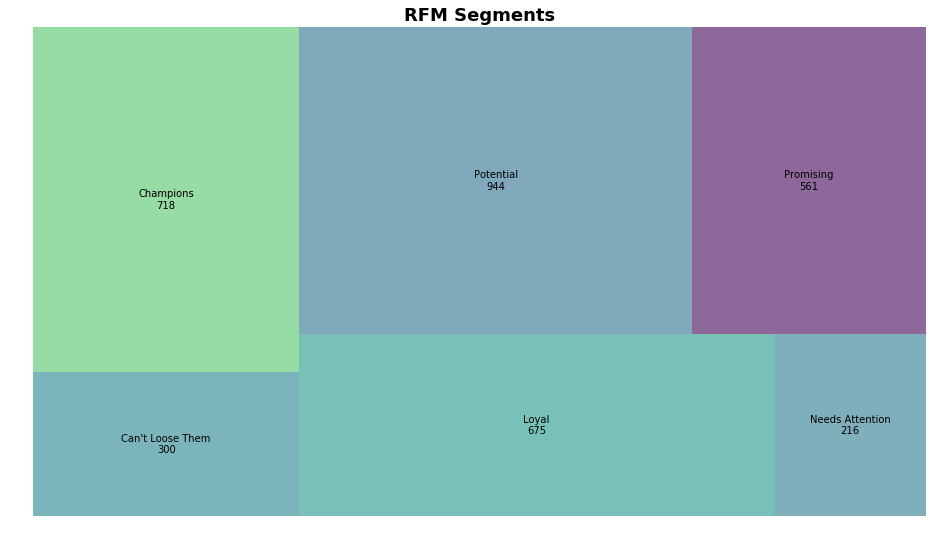

In [33]:
#rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfm_level_agg['Count'], 
              label=['Can\'t Loose Them\n300',
                     'Champions\n718',
                     'Loyal\n675',
                     'Needs Attention\n216',
                     'Potential\n944', 
                     'Promising\n561', 
                     'Require Activation\n'], alpha=.6 )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

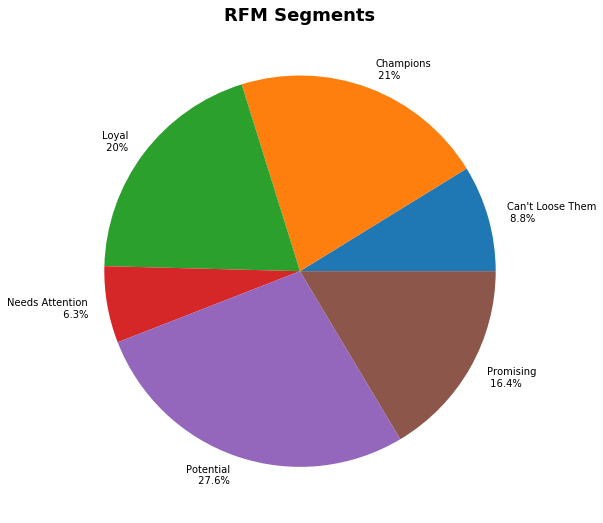

In [66]:
#rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
plt.pie(rfm_level_agg['Count'], labels=["Can't Loose Them\n 8.8%","Champions\n 21%","Loyal\n 20%","Needs Attention\n 6.3%","Potential\n 27.6%","Promising\n 16.4%"])
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

In [61]:
rfm_level_agg['Count']

RFM_Level
Can't Loose Them    300
Champions           718
Loyal               675
Needs Attention     216
Potential           944
Promising           561
Name: Count, dtype: int64

In [34]:
data_process.head(5)

,customer_id,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score,RFM_Level
0,1,8.0,11,9084.45,1,5,5,11.0,Champions
1,2,129.0,3,4149.07,5,1,2,8.0,Potential
2,3,103.0,8,9888.23,5,5,5,15.0,Can't Loose Them
3,4,196.0,2,1047.72,5,1,1,7.0,Potential
4,5,17.0,6,5903.20,2,3,3,8.0,Potential


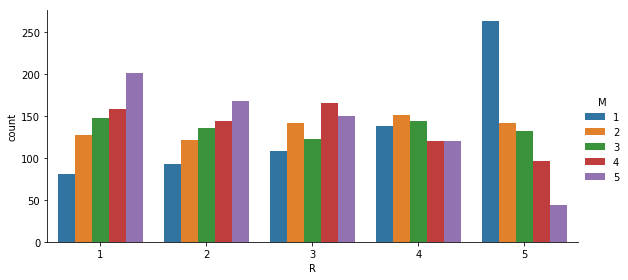

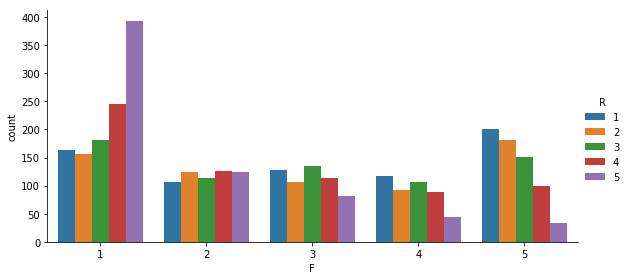

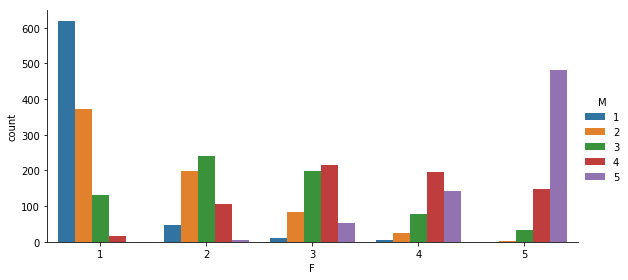

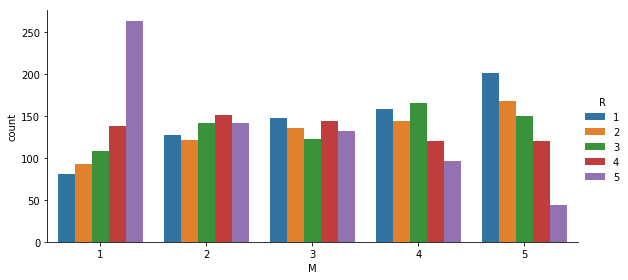

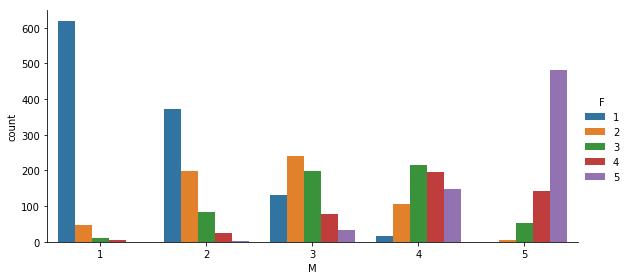

In [35]:
# Visualizing the catplot
sns.catplot('R',kind="count",data=data_process, hue = 'M', height=4, aspect=2)
sns.catplot('F',kind="count",data=data_process, hue = 'R', height=4, aspect=2)
sns.catplot('F',kind="count",data=data_process, hue = 'M', height=4, aspect=2)
sns.catplot('M',kind="count",data=data_process, hue = 'R', height=4, aspect=2)
sns.catplot('M',kind="count",data=data_process, hue = 'F', height=4, aspect=2)


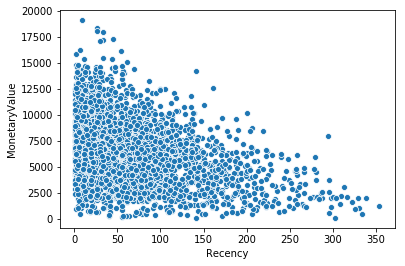

In [36]:
# Visualizing the scatterplot
sns.scatterplot(data=data_process, y="MonetaryValue", x="Recency")

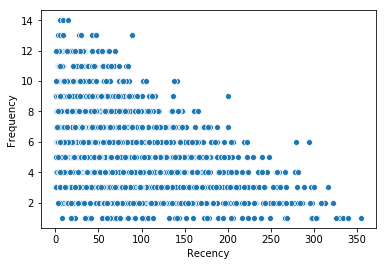

In [37]:
sns.scatterplot(data=data_process, x="Recency", y="Frequency")

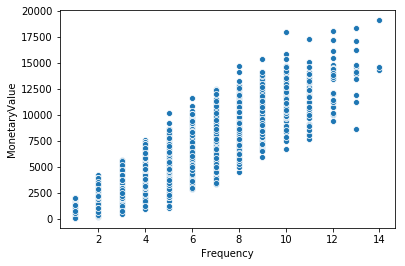

In [38]:
sns.scatterplot(data=data_process, x="Frequency", y="MonetaryValue")

# Model 3 Dashboard

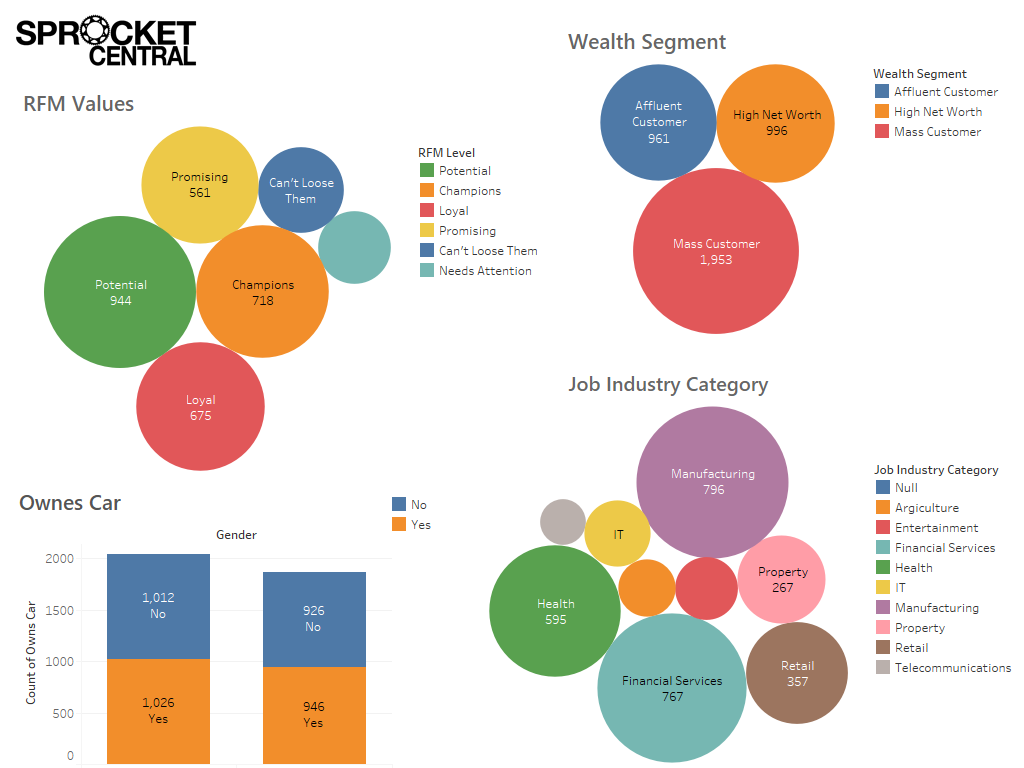

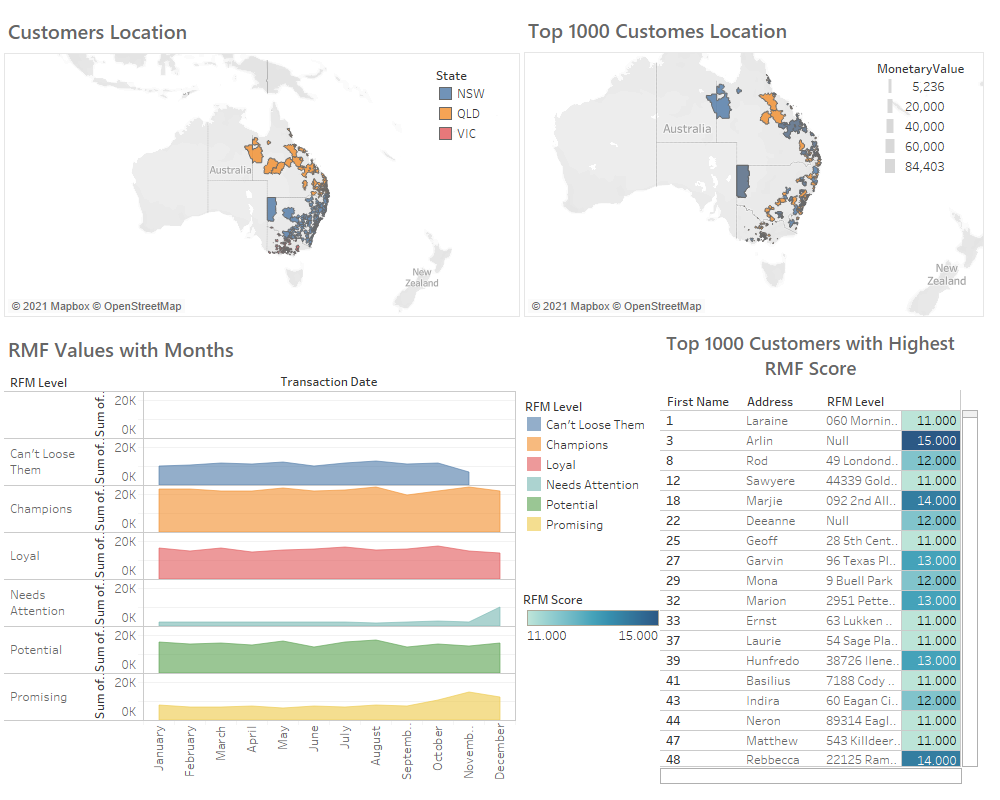